# Импорт данных

Импортируем библиотеки для работы с данными, построения графиков, а также отключим варнинги, чтобы не мешали

In [447]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Загрузим датасет и посмотрим, какие фичи у нас имеются. Целевой перменной, конечно же, будет цена

In [448]:
df = pd.read_csv("laptops.csv", encoding='ISO-8859-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Преобразование данных

In [449]:
# функция describe для расширенных характеристик данных
df.describe(include = 'all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


Сразу можем удалить классовые значения, среди которых слишком много уникальных: laptop_ID, Product, Cpu, Gpu
Преобразуем Weigth в числовой формат, а Ram оставим классами для дальнейшей группировки

In [450]:
# удаляем ненужные столбцы
del df['laptop_ID'], df['Product'], df['Cpu'], df['Gpu']

# удаляем единицу измерения и преобразуем к типу float
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype(float)

# переименуем для однообразия
df.rename(columns={'Price_euros': 'Price'}, inplace=True)

# Исследование данных

In [451]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,8GB,256GB SSD,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,512GB SSD,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,256GB SSD,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,128GB SSD,Windows 10,1.80,638.00
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,512GB SSD,Windows 10,1.30,1499.00
1300,Lenovo,Notebook,14.0,1366x768,2GB,64GB Flash Storage,Windows 10,1.50,229.00
1301,HP,Notebook,15.6,1366x768,6GB,1TB HDD,Windows 10,2.19,764.00


In [453]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Ram                  object
Memory               object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [454]:
# проверка на отсутствующие значения
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Ram                 0
Memory              0
OpSys               0
Weight              0
Price               0
dtype: int64

Построим графики отношения всех классификационных признаков к цене, чтобы понять, какие параметры лучше распределены

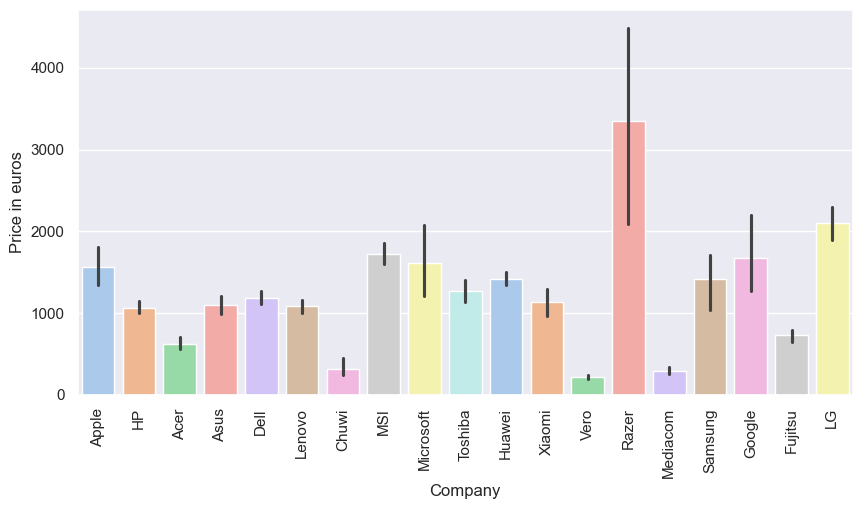

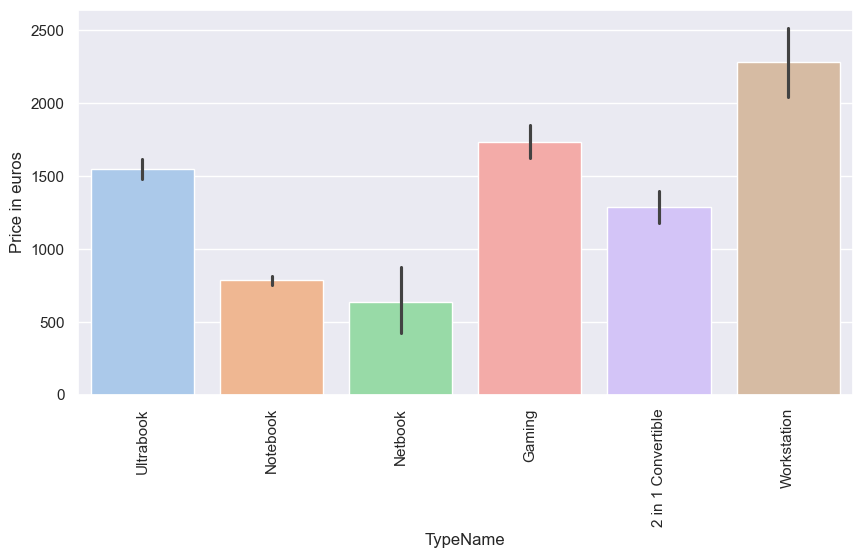

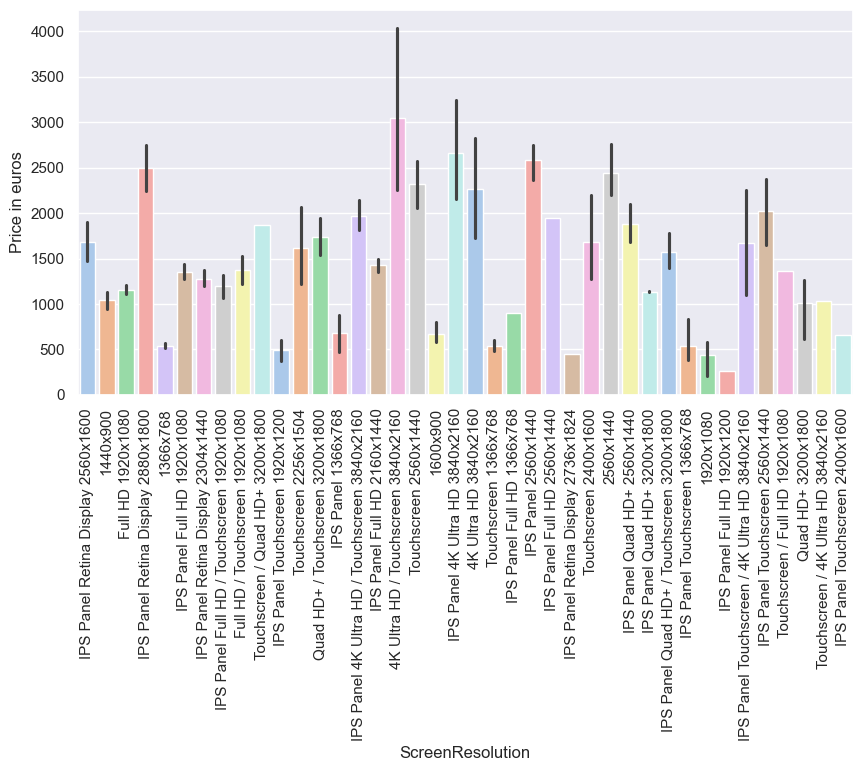

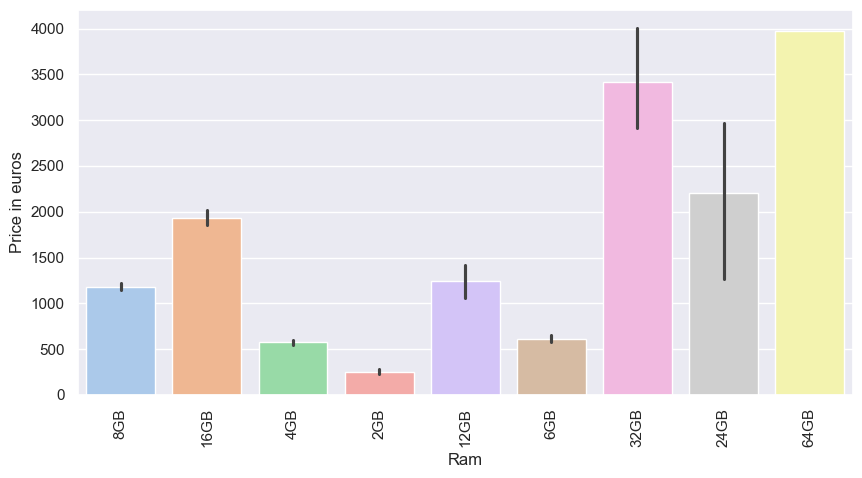

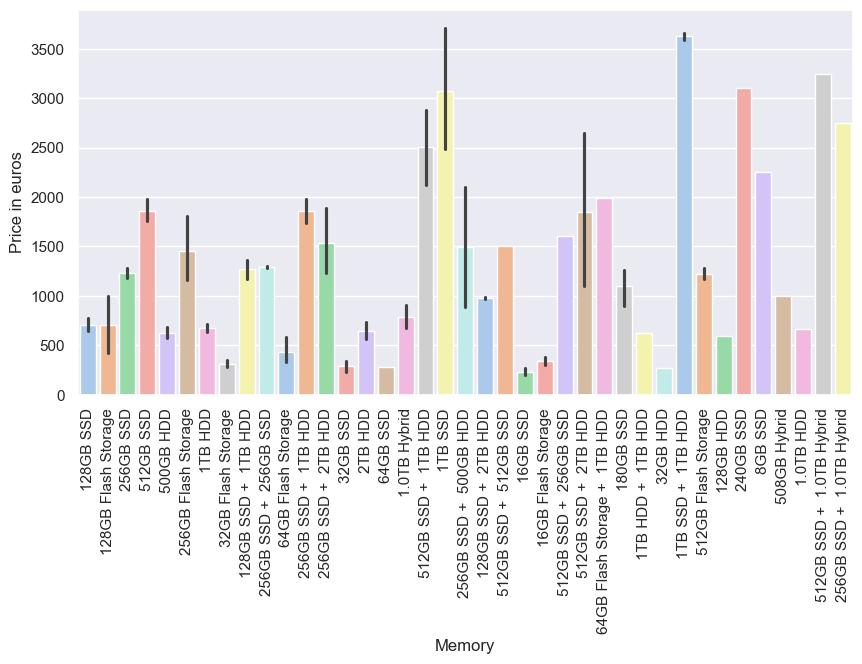

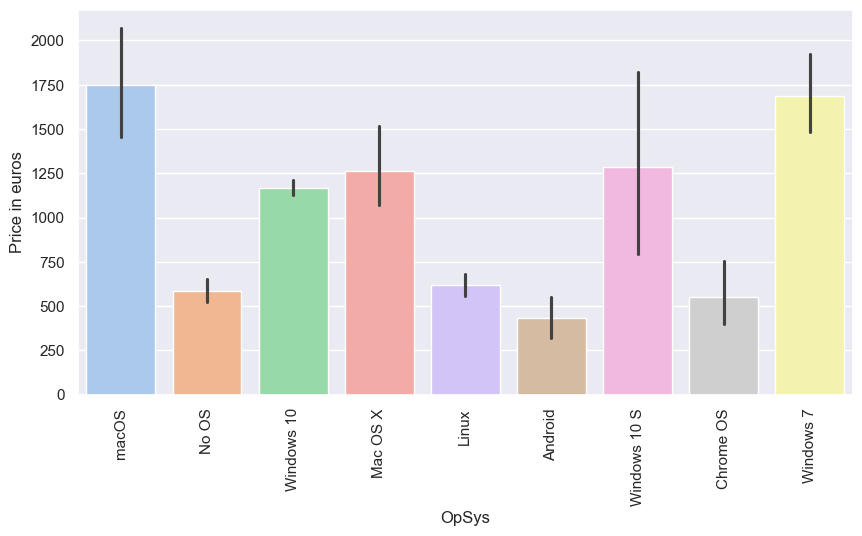

In [455]:
# столбцы, по которым будут строиться графики
cat_vars = ['Company', 'TypeName', 'ScreenResolution', 'Ram', 'Memory', 'OpSys']

def plot_cat_var(df, var):
    plt.figure(figsize = (10, 5)) # размер полотна
    sns.barplot(
        x = var, # признак
        y = 'Price',
        data = df,
        palette = sns.color_palette('pastel')
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Price in euros')
    plt.show()

# вызовем для каждого
for var in cat_vars:
    plot_cat_var(df, var)

Посмотрим также на числовые признаки

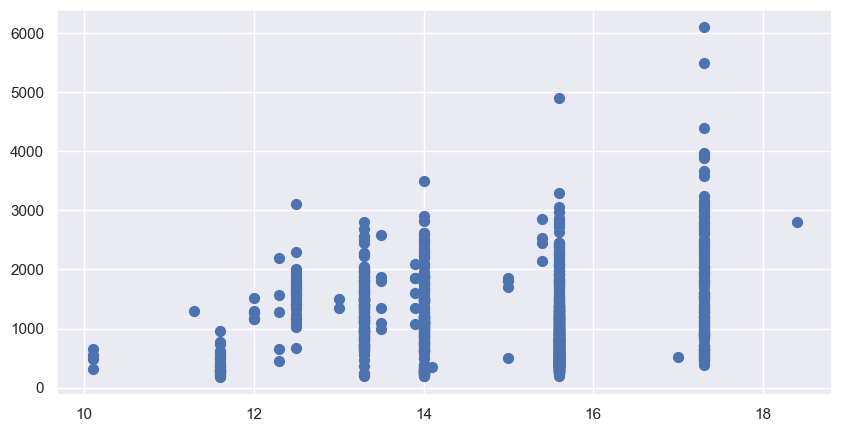

In [456]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()

ax.scatter(df["Inches"], df["Price"], s=50)

plt.show()

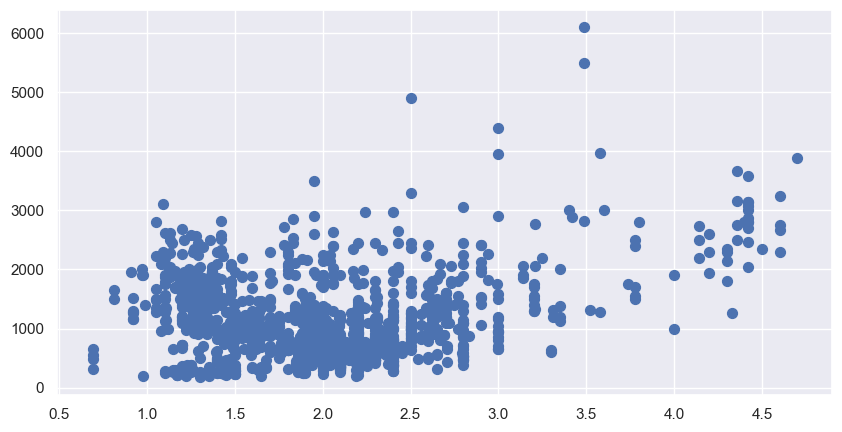

In [457]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()

ax.scatter(df["Weight"], df["Price"], s=50)

plt.show()

И распределение цены

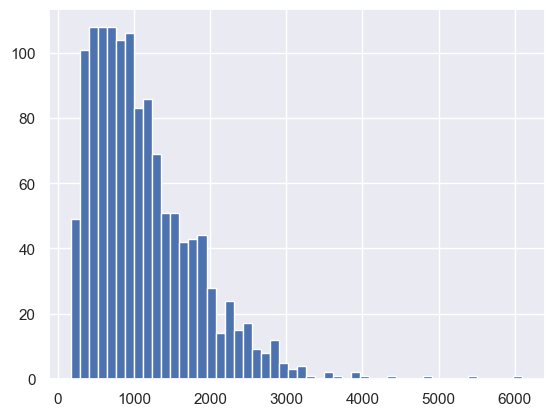

In [458]:
plt.hist(df["Price"], bins=50) # bins - количество интервалов
plt.show()

# Нормализация

Импорт библиотек для нормализации и для дальнейшего обучения моделей

In [470]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Классовые значения преобразуем в числовые следующим способом:
для каждого класса получим среднее значение цены, а затем все эти значения нормализуем

In [460]:
# признаки, которые преобразуем
cat_vars = ['Company', 'TypeName', 'ScreenResolution', 'Ram', 'Memory', 'OpSys']

for var in cat_vars:
    # считаем среднее значение с помощью groupby
    grouped = df.groupby(var)['Price'].mean().reset_index()
    # преобразуем класс + значение в словарь
    grouped_dict = grouped.set_index(var)['Price'].to_dict()
    # с помощью этого словаря подменяем данные
    df[var] = df[var].map(grouped_dict)

df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price
0,1564.198571,1548.230357,13.3,1679.956667,1180.812940,707.774342,1749.630769,1.37,1339.69
1,1564.198571,1548.230357,13.3,1038.660000,1180.812940,707.985000,1749.630769,1.34,898.94
2,1067.774854,782.078624,15.6,1156.530256,1180.812940,1229.387451,587.973333,1.86,575.00
3,1564.198571,1548.230357,15.4,2493.847500,1936.771150,1860.811017,1749.630769,1.83,2537.45
4,1564.198571,1548.230357,13.3,1679.956667,1180.812940,1229.387451,1749.630769,1.37,1803.60
...,...,...,...,...,...,...,...,...,...
1298,1086.384444,1282.401653,14.0,1201.118491,574.572480,707.774342,1168.139478,1.80,638.00
1299,1086.384444,1282.401653,13.3,1576.666667,1936.771150,1860.811017,1168.139478,1.30,1499.00
1300,1086.384444,782.078624,14.0,542.210498,254.370455,435.677333,1168.139478,1.50,229.00
1301,1067.774854,782.078624,15.6,542.210498,615.206341,674.152242,1168.139478,2.19,764.00


In [461]:
# нормализуем все, кроме цены
columns = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory', 'OpSys', 'Weight']
scaler = MinMaxScaler()

scaler.fit(df[columns]);
normolized = scaler.transform(df[columns])
# объединяем нормализованные значения с ненормализованной ценой
df = pd.DataFrame(normolized, columns=columns).merge(df['Price'], left_index=True, right_index=True)
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price
0,0.430455,0.554701,0.385542,0.509519,0.249002,0.142198,1.000000,0.169576,1339.69
1,0.430455,0.554701,0.385542,0.278591,0.249002,0.142260,1.000000,0.162095,898.94
2,0.271789,0.088708,0.662651,0.321036,0.249002,0.295624,0.117034,0.291771,575.00
3,0.430455,0.554701,0.638554,0.802598,0.452182,0.481350,1.000000,0.284289,2537.45
4,0.430455,0.554701,0.385542,0.509519,0.249002,0.295624,1.000000,0.169576,1803.60
...,...,...,...,...,...,...,...,...,...
1298,0.277737,0.393017,0.469880,0.337092,0.086061,0.142198,0.558013,0.276808,638.00
1299,0.277737,0.393017,0.385542,0.472325,0.452182,0.481350,0.558013,0.152120,1499.00
1300,0.277737,0.088708,0.469880,0.099822,0.000000,0.062164,0.558013,0.201995,229.00
1301,0.271789,0.088708,0.662651,0.099822,0.096982,0.132309,0.558013,0.374065,764.00


# Обучение моделей

Опытным путем было решено использовать все переменные для обучения моделей

In [462]:
X = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory', 'OpSys', 'Weight']]
y = df['Price']

# разбиваем данные на тренировочные и тестовые в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

В качестве первой модели используем обыкновенную линейную регрессию

In [463]:
# создание и тренировка
LinearReg = LinearRegression().fit(X_train, y_train)

# предсказание на тренировочной и валидационной выборке
yPredTrain_LinReg = LinearReg.predict(X_train)
yPredTest_LinReg = LinearReg.predict(X_test)

# рассчет метрик
# MSE - среднеквадратичная ошибка
print("MSE on training data = ", mean_squared_error(y_train, yPredTrain_LinReg))
print("MSE on testing data = ", mean_squared_error(y_test, yPredTest_LinReg))
# RMSE - кореньиз среднеквадратичной ошибки
print("RMSE on training data = ", math.sqrt(mean_squared_error(y_train, yPredTrain_LinReg)))
print("RMSE on testing data = ", math.sqrt(mean_squared_error(y_test, yPredTest_LinReg)))
# MSE - средняя абсолютная ошибка
print("MAE on training data = ", mean_absolute_error(y_train, yPredTrain_LinReg))
print("MAE on testing data = ", mean_absolute_error(y_test, yPredTest_LinReg))

MSE on training data =  156469.85394063868
MSE on testing data =  121432.1947964689
RMSE on training data =  395.56270544711197
RMSE on testing data =  348.47122520585384
MAE on training data =  285.2205373288363
MAE on testing data =  261.12248435563015


Результаты кажутся неплохими, но попробуем улучшить показатели с помощью регуляризации Лассо
Она работает также, но дополнительно мы подбираем коэффициент alpha - параметр регуляризации. Он контролирует силу регуляризации. Большие значения alpha делают регуляризацию более сильной и могут привести к уменьшению коэффициентов ближе к нулю

In [466]:
lasso_reg = Lasso()

# Сетка значений alpha для поиска
param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
    100, 500, 1000]}

# Создаем объект GridSearchCV, выполните поиск и получаем лучшее значение alpha
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5)  # cv - количество фолдов в кросс-валидации
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']

# Обучаем модель с лучшим alpha
LassoReg = Lasso(alpha=best_alpha)
LassoReg.fit(X_train, y_train)

yPredTrain_LassoReg = LassoReg.predict(X_train)
yPredTest_LassoReg = LassoReg.predict(X_test)

print("MSE on training data = ", mean_squared_error(y_train, yPredTrain_LassoReg))
print("MSE on testing data = ", mean_squared_error(y_test, yPredTest_LassoReg))
print("RMSE on training data = ", math.sqrt(mean_squared_error(y_train, yPredTrain_LassoReg)))
print("RMSE on testing data = ", math.sqrt(mean_squared_error(y_test, yPredTest_LassoReg)))
print("MAE on training data = ", mean_absolute_error(y_train, yPredTrain_LassoReg))
print("MAE on testing data = ", mean_absolute_error(y_test, yPredTest_LassoReg))

MSE on training data =  156506.5342570056
MSE on testing data =  121071.96618376243
RMSE on training data =  395.6090674605495
RMSE on testing data =  347.9539713579404
MAE on training data =  284.7579451559746
MAE on testing data =  260.75552511411206


Результаты лучше, но совсем немного.
Переходим к другой модели - DecisionTreeRegressor - это модель машинного обучения, которая использует решающее дерево для выполнения задачи регрессии

In [468]:
DTReg = DecisionTreeRegressor(random_state=50).fit(X_train, y_train) # random_state - начальное состояние генератора случайных

yPredTrain_DTReg = DTReg.predict(X_train)
yPredTest_DTReg = DTReg.predict(X_test)

print("MSE on training data = ", mean_squared_error(y_train, yPredTrain_DTReg))
print("MSE on testing data = ", mean_squared_error(y_test, yPredTest_DTReg))
print("RMSE on training data = ", math.sqrt(mean_squared_error(y_train, yPredTrain_DTReg)))
print("RMSE on testing data = ", math.sqrt(mean_squared_error(y_test, yPredTest_DTReg)))
print("MAE on training data = ", mean_absolute_error(y_train, yPredTrain_DTReg))
print("MAE on testing data = ", mean_absolute_error(y_test, yPredTest_DTReg))

MSE on training data =  94179.32315785164
MSE on testing data =  117084.2178554179
RMSE on training data =  306.88649881976175
RMSE on testing data =  342.1757119601242
MAE on training data =  207.30741838563566
MAE on testing data =  240.1955177130466


Ее результаты лучше и мы можем посмотреть дерево решений

In [471]:
print(export_text(DTReg))

|--- feature_2 <= 0.36
|   |--- feature_2 <= 0.17
|   |   |--- feature_1 <= 0.47
|   |   |   |--- feature_3 <= 0.80
|   |   |   |   |--- feature_3 <= 0.35
|   |   |   |   |   |--- feature_0 <= 0.20
|   |   |   |   |   |   |--- feature_2 <= 0.04
|   |   |   |   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |   |   |   |--- value: [174.00]
|   |   |   |   |   |   |   |--- feature_1 >  0.04
|   |   |   |   |   |   |   |   |--- value: [264.50]
|   |   |   |   |   |   |--- feature_2 >  0.04
|   |   |   |   |   |   |   |--- feature_1 <= 0.24
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.12
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- value: [297.00]
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.04
|   |   |   |   |   |   |   |   |   |   |--- value: [311.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  0.12
|   |   |   |   |   |   |   |   |   |--- value: [335.51]
|   |   |   |   |   |   |   |--- feature_1